<a href="https://colab.research.google.com/github/indanaalya/akhiragustus/blob/main/Studi_Kasus_Employee_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Studi Kasus Employee Churn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('employee_churn.csv')
df

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender,churn
0,8511.0,42.51,1.0,bachelor/diploma,3.416556,33.309014,-93.330348,0,0
1,10090.0,57.48,2.0,bachelor/diploma,2.897149,37.678983,-98.968097,0,0
2,18652.0,41.22,2.0,bachelor/diploma,3.180264,37.175891,-77.442812,1,1
3,13392.0,63.57,3.0,bachelor/diploma,3.429648,44.408084,-85.703296,0,0
4,13356.0,46.16,2.0,bachelor/diploma,3.812226,41.454702,-81.404655,1,1
...,...,...,...,...,...,...,...,...,...
1028,12972.0,73.90,2.0,bachelor/diploma,2.661765,44.070087,-91.305675,0,0
1029,7881.0,37.09,2.0,masters degree,2.518952,33.188727,-79.078901,0,1
1030,12003.0,66.86,1.0,masters degree,4.882591,39.208364,-93.532059,0,0
1031,9843.0,52.03,2.0,masters degree,3.829853,37.376921,-90.193134,0,0


Analisis Employee Churn adalah sebuah studi terhadap tingkat 'churn' dari karyawan perusahaan. Employee (karyawan) dibilang 'Churn' ketika karyawan tersebut pindah kerja ke kantor lain (berhenti bekerja di kantor asal). Secara garis besar, perusahaan-perusahaan ingin bisa 'memprediksi' employee mana yang akan 'churn', supaya bisa melakukan antisipasi agar employee tersebut tidak jadi 'churn'. Mengapa? Karena...lebih besar ongkos yang dikeluarkan untuk mencari & merekrut karyawan baru, melatih mereka dari 0 lagi, ketimbang mempertahankan employee yang sudah ada. Oleh sebab itu, perusahaan-perusahaan ingin mempelajari faktor-faktor apa saja yang dapat dilihat untuk mengantisipasi 'churn' dari seorang employee. 


Setiap baris merepresentasi data dari seorang employee. 

Penjelasan setiap kolom:
- `office_distance_from_house`: jarak (dalam meter) kantor ke rumah karyawan
- `bonus_salary_percentage`: persentase bonus gaji yang diterima karyawan dalam 6 bulan terakhir
- `job_satisfaction`: tingkat kepuasan kerja karyawan
- `education_level`: tingkat pendidikan karyawan
- `overtime_hour`: lama waktu lembur rata-rata (dalam jam)
- `company_latitude`: koordinat garis lintang kantor pusat perusahaan
- `company_longitude`: koordinat garis bujur kantor pusat perusahaan
- `gender`: apabila 0, berarti perempuan, apabila 1, berarti laki-laki
- `churn`: apabila 1, berarti Churn (si karyawan pindah), apabila 0, berarti tidak Churn (karyawan tidak pindah)

### Soal:

1. (30 POIN) Lakukan explorasi dan visualisasi data secara bebas dan tulislah (dalam poin-poin) insights yang Anda peroleh. Berikan minimal 7 poin-poin. 
2. (20 POIN) Lakukanlah data preparation yang diperlukan (misal: mengubah kolom kategorikal menjadi kolom numerikal, dst). Tuliskanlah langkah-langkah yang Anda lakukan dalam tahap ini. 
3. (20 POIN) Tentukan False Positive dan False Negative dari kasus ini. Mana yang lebih 'penting' untuk diperhatikan? Mana yang lebih 'penting' untuk kita hindari? False Positive, atau False Negative? 
4. (30 POIN) Buatlah Machine Learning Model untuk mengklasifikasikan apakah employee akan Churn atau tidak. Kolom 'target' adalah kolom 'Churn'. Evaluasi-lah machine learning model Anda, dan tentukanlah metrik-metrik yang tepat untuk mengukur akurasi dari machine learning model tersebut. 

### Petunjuk:

1. Kerjakanlah pekerjaan kalian di bagian "Tempat Mengerjakan" (di bawah)
2. Jawablah keempat soal di atas di bagian "Jawaban". 

#### Tempat Mengerjakan:

In [ ]:
## silakan tambahkan lagi cell-cell jika dirasa kurang ##

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   office_distance_from_house  1033 non-null   float64
 1   bonus_salary_percentage     1033 non-null   float64
 2   job_satisfaction            1033 non-null   float64
 3   education_level             1033 non-null   object 
 4   overtime_hour               1033 non-null   float64
 5   company_latitude            1033 non-null   float64
 6   company_longitude           1033 non-null   float64
 7   gender                      1033 non-null   int64  
 8   churn                       1033 non-null   int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 72.8+ KB


In [ ]:
df.nunique()

office_distance_from_house    1000
bonus_salary_percentage        923
job_satisfaction                 6
education_level                  4
overtime_hour                 1033
company_latitude              1033
company_longitude             1033
gender                           2
churn                            2
dtype: int64

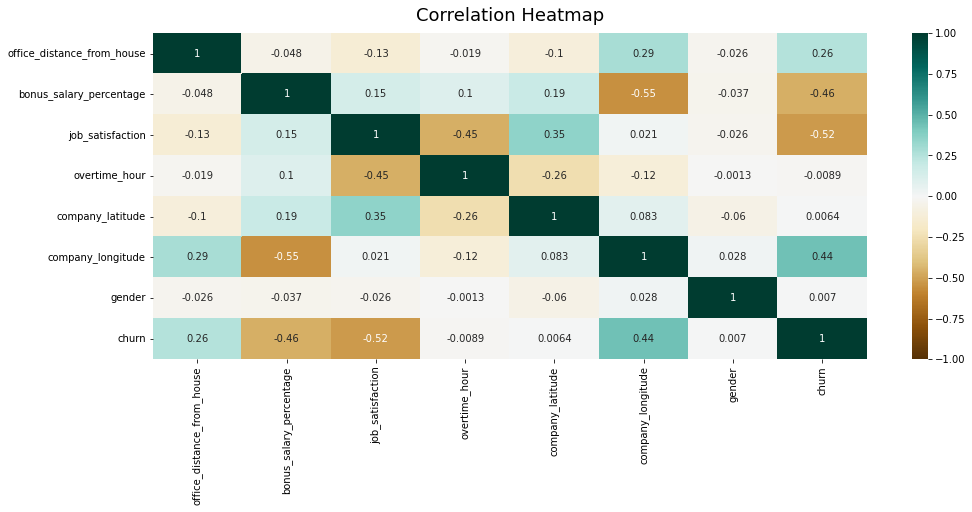

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

Ide Visualisasi
1.   Analisis hubungan jarak ke kantor dengan churn
2.   Analisis kepuasan kerja terhadap churn karyawan
3. Hubungan bonus yang diterima dengan kepuasan kerja
4. Analisis bonus salary dan churn
5. Analisis overtime hour dengan job satisfaction
6. gender terhadap churn




# 1. Eksplorasi dan Visualisasi Data

#### Kepuasan Kerja terhadap churn

In [ ]:
df.groupby(['job_satisfaction', 'churn'])['churn'].count()

job_satisfaction  churn
0.0               0          5
                  1          2
1.0               0         42
                  1         82
2.0               0        176
                  1        207
3.0               0        390
                  1         18
4.0               0        105
5.0               0          6
Name: churn, dtype: int64

In [ ]:
churn = df[df['churn']==1].groupby('job_satisfaction')['churn'].count().reset_index()
churn

,job_satisfaction,churn
0,0.0,2
1,1.0,82
2,2.0,207
3,3.0,18


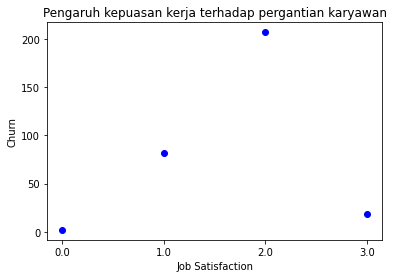

In [ ]:
churn['job_satisfaction'] = churn['job_satisfaction'].astype(str)

x = churn['job_satisfaction'].unique()
y = churn['churn']
bar_jc = plt.scatter(x, y, color='blue')

plt.xlabel('Job Satisfaction')
plt.ylabel('Churn')
plt.title("Pengaruh kepuasan kerja terhadap pergantian karyawan")

plt.show()

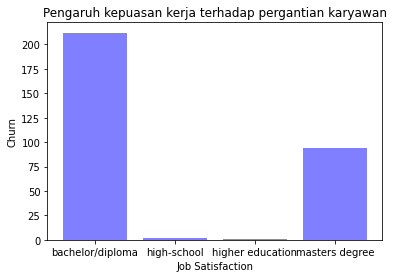

In [ ]:
df.groupby(['education_level', 'churn'])['churn'].count()

churn = df[df['churn']==1].groupby('education_level')['churn'].count().reset_index()

x = churn['education_level'].unique()
y = churn['churn']
bar_jc = plt.bar(x, y, color='blue', alpha=0.5)

plt.xlabel('Job Satisfaction')
plt.ylabel('Churn')
plt.title("Pengaruh kepuasan kerja terhadap pergantian karyawan")

plt.show()

In [ ]:
df[df['churn']==1].value_counts()

office_distance_from_house  bonus_salary_percentage  job_satisfaction  education_level   overtime_hour  company_latitude  company_longitude  gender  churn
583.0                       42.41                    2.0               masters degree    2.158352       47.263911         -85.907794         0       1        1
14124.0                     38.29                    2.0               bachelor/diploma  2.684185       36.186407         -78.765462         1       1        1
14480.0                     34.52                    1.0               bachelor/diploma  3.869863       37.513877         -78.578724         0       1        1
14445.0                     39.35                    2.0               bachelor/diploma  3.299109       39.802510         -83.896865         0       1        1
14435.0                     46.11                    2.0               bachelor/diploma  3.675331       45.291324         -82.773492         1       1        1
                                             

In [ ]:
halo = df.groupby('job_satisfaction')['churn'].sum()
halo

job_satisfaction
0.0      2
1.0     82
2.0    207
3.0     18
4.0      0
5.0      0
Name: churn, dtype: int64

In [ ]:
x = df_churn1['job_satisfaction'].unique()
y = df_churn1.groupby['job_satisfaction']('churn').sum()
plot = plt.bar(x, y, color='blue', alpha=0.5)
plt.show()

NameError: ignored

In [ ]:
x = df["job_satisfaction"].unique()
y = df['churn'].value_counts()[1]
plot1 = plt.bar(x, y, color='blue', alpha=0.5)
plt.show

"""
Karyawan dengan tingkat kepuasan kerja yang rendah cenderung 
"""

In [ ]:
x = df['office_distance_from_house']
plot_hist = plt.hist(x, bins=10, facecolor='r', alpha=0.5)
plt.xlabel("jarak rumah ke kantor")
plt.ylabel("Total data")
plt.title("Histogram")
plt.show()

#### Bonus salary dengan Job Satisfaction

In [ ]:
df["bonus_salary_percentage"]

pandas.core.series.Series

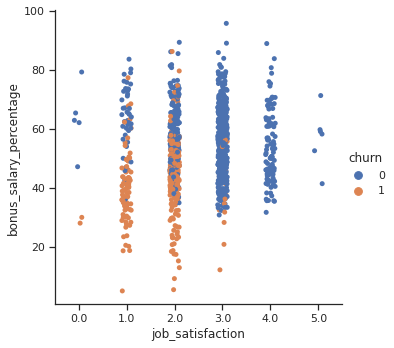

In [ ]:
sns.set_theme(style="ticks")
bonusJobsat = sns.catplot(x="job_satisfaction", y="bonus_salary_percentage", hue="churn", data=df)
bonusJobsat

### Jawaban:

#### Nomor 1.

Berikut adalah insights yang saya temui:
- [contoh] Karyawan pria memiliki kecenderungan yang lebih tinggi untuk pindah perusahaan. Hal ini dapat dilihat dari ____. 

#### Nomor 2.

- Saya melakukan __ pada kolom __ karena __. 
- Kemudian, saya melakukan __ pada kolom __ karena __. 
- dst

#### Nomor 3.

- False Positive dari kasus ini adalah __.
- False Negative dari kasus ini adalah __.
- Dalam kasus ini, tipe 'kesalahan' yang lebih penting untuk diperhatikan adalah __ karena __.

#### Nomor 4.

- Saya menggunakan Machine Learning Model: __.
- Untuk mengevaluasi model tersebut, saya menggunakan metrik: __, __, dst.
- Hasil evaluasi dari model tersebut adalah sebagai berikut:
    - [contoh]  RMSE: 90%
    - [contoh]  MAE: 0.976